In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('winequality-red.csv')

In [3]:
(data.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
data.shape


(1599, 12)

In [5]:
data.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


(array([ 37., 515., 323., 257., 232., 119.,  87.,  21.,   7.,   1.]),
 array([ 8.4 ,  9.05,  9.7 , 10.35, 11.  , 11.65, 12.3 , 12.95, 13.6 ,
        14.25, 14.9 ]),
 <BarContainer object of 10 artists>)

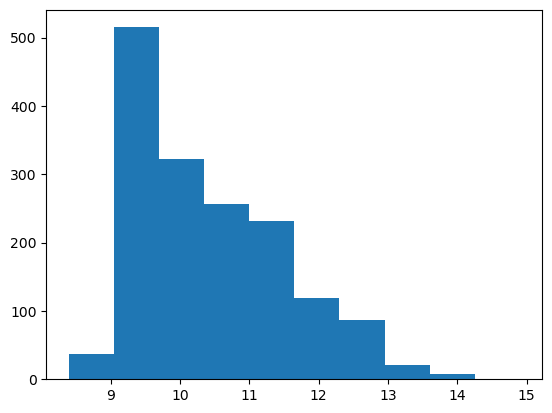

In [7]:
plt.hist(data.alcohol)

In [6]:
data.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

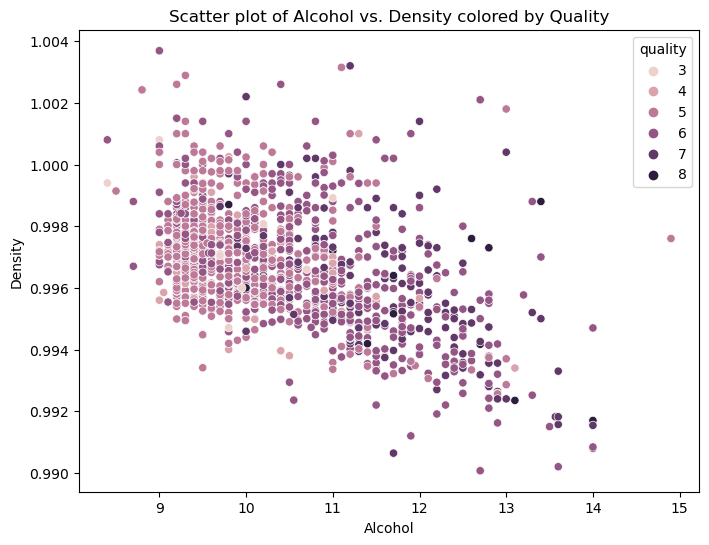

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='alcohol', y='density', hue='quality')
plt.title('Scatter plot of Alcohol vs. Density colored by Quality')
plt.xlabel('Alcohol')
plt.ylabel('Density')
plt.show()

In [9]:
predictors_col=['alcohol', 'density','fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','pH','sulphates']
target_col=['quality']


In [10]:
predictors = data[predictors_col]
target = data[target_col]

In [11]:
predictors

,alcohol,density,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,sulphates
0,9.4,0.99780,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56
1,9.8,0.99680,7.8,0.880,0.00,2.6,0.098,25.0,67.0,3.20,0.68
2,9.8,0.99700,7.8,0.760,0.04,2.3,0.092,15.0,54.0,3.26,0.65
3,9.8,0.99800,11.2,0.280,0.56,1.9,0.075,17.0,60.0,3.16,0.58
4,9.4,0.99780,7.4,0.700,0.00,1.9,0.076,11.0,34.0,3.51,0.56
...,...,...,...,...,...,...,...,...,...,...,...
1594,10.5,0.99490,6.2,0.600,0.08,2.0,0.090,32.0,44.0,3.45,0.58
1595,11.2,0.99512,5.9,0.550,0.10,2.2,0.062,39.0,51.0,3.52,0.76
1596,11.0,0.99574,6.3,0.510,0.13,2.3,0.076,29.0,40.0,3.42,0.75
1597,10.2,0.99547,5.9,0.645,0.12,2.0,0.075,32.0,44.0,3.57,0.71


In [25]:
corr = predictors.corr
corr

<bound method DataFrame.corr of       alcohol  density  fixed acidity  volatile acidity  citric acid  \
0         9.4  0.99780            7.4             0.700         0.00   
1         9.8  0.99680            7.8             0.880         0.00   
2         9.8  0.99700            7.8             0.760         0.04   
3         9.8  0.99800           11.2             0.280         0.56   
4         9.4  0.99780            7.4             0.700         0.00   
...       ...      ...            ...               ...          ...   
1594     10.5  0.99490            6.2             0.600         0.08   
1595     11.2  0.99512            5.9             0.550         0.10   
1596     11.0  0.99574            6.3             0.510         0.13   
1597     10.2  0.99547            5.9             0.645         0.12   
1598     11.0  0.99549            6.0             0.310         0.47   

      residual sugar  chlorides  free sulfur dioxide  total sulfur dioxide  \
0                1.9     

In [35]:
corr = data.corr()

In [36]:
x_train, x_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)

In [37]:
tree = DecisionTreeClassifier()

In [38]:
arbol=tree.fit(x_train, y_train)

[Text(0.5689812822719449, 0.9722222222222222, 'x[0] <= 10.525\ngini = 0.642\nsamples = 1279\nvalue = [9, 43, 551, 506, 157, 13]'),
 Text(0.3675236660929432, 0.9166666666666666, 'x[8] <= 98.5\ngini = 0.541\nsamples = 786\nvalue = [6, 27, 465, 256, 30, 2]'),
 Text(0.22299913941480207, 0.8611111111111112, 'x[10] <= 0.575\ngini = 0.568\nsamples = 689\nvalue = [6, 26, 375, 251, 29, 2]'),
 Text(0.07228915662650602, 0.8055555555555556, 'x[0] <= 9.75\ngini = 0.496\nsamples = 263\nvalue = [4, 20, 176, 59, 4, 0]'),
 Text(0.03571428571428571, 0.75, 'x[9] <= 3.54\ngini = 0.389\nsamples = 165\nvalue = [2, 11, 126, 25, 1, 0]'),
 Text(0.032271944922547334, 0.6944444444444444, 'x[0] <= 9.075\ngini = 0.372\nsamples = 162\nvalue = [2, 11, 126, 22, 1, 0]'),
 Text(0.013769363166953529, 0.6388888888888888, 'x[5] <= 2.05\ngini = 0.711\nsamples = 11\nvalue = [1, 3, 3, 4, 0, 0]'),
 Text(0.0068846815834767644, 0.5833333333333334, 'x[1] <= 0.996\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3, 0, 0, 0]'),
 Text(0.0

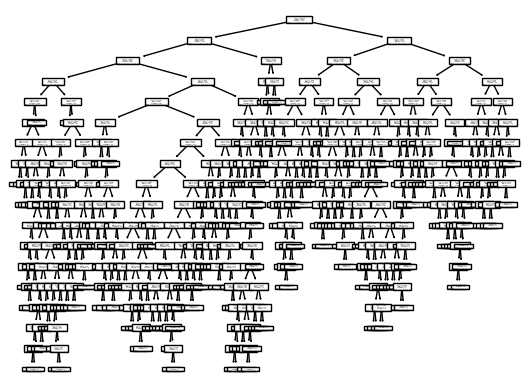

In [39]:
plot_tree(arbol)

In [44]:
predicciones = arbol.predict(x_test)

In [45]:
predicciones

array([5, 4, 6, 4, 6, 5, 5, 5, 6, 6, 7, 6, 6, 5, 5, 6, 6, 6, 7, 5, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 6, 5, 6, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 6, 5, 5, 6, 5, 5, 6, 7, 5, 6, 6, 5, 6, 5, 6, 5, 6, 5, 7, 6,
       6, 5, 7, 5, 6, 5, 5, 6, 6, 5, 6, 5, 5, 7, 5, 7, 5, 6, 7, 7, 5, 6,
       6, 5, 7, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 7, 6, 7, 6, 5, 7, 6,
       6, 5, 7, 5, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 5, 7, 5, 5, 6, 5, 6,
       5, 6, 6, 4, 5, 6, 5, 7, 7, 6, 5, 5, 6, 5, 7, 6, 5, 5, 6, 6, 4, 5,
       5, 5, 5, 7, 5, 6, 8, 5, 6, 5, 6, 5, 6, 5, 3, 5, 5, 5, 7, 5, 7, 6,
       6, 5, 5, 5, 6, 5, 6, 6, 5, 7, 6, 6, 7, 5, 5, 7, 5, 6, 5, 5, 5, 6,
       5, 7, 5, 6, 5, 5, 7, 5, 5, 4, 5, 7, 8, 5, 5, 7, 7, 7, 6, 5, 6, 5,
       6, 6, 6, 4, 6, 5, 5, 7, 5, 6, 6, 5, 7, 6, 5, 7, 5, 7, 6, 5, 7, 5,
       6, 7, 6, 7, 5, 5, 6, 5, 6, 4, 5, 6, 6, 5, 5, 4, 6, 6, 5, 6, 5, 7,
       6, 6, 5, 5, 6, 6, 5, 7, 5, 6, 5, 6, 6, 7, 7, 6, 7, 5, 6, 6, 5, 7,
       5, 6, 5, 6, 5, 6, 8, 6, 5, 6, 5, 7, 6, 6, 5,

In [46]:
pd.crosstab(np.array([y[0] for y in y_test.values.tolist()]), predicciones, rownames=['Actual'], colnames=['predicciones'])

predicciones,3,4,5,6,7,8
Actual,,,,,,
3,0,0,0,1,0,0
4,0,0,6,4,0,0
5,1,6,86,34,3,0
6,0,3,39,70,19,1
7,0,1,3,13,23,2
8,0,0,1,3,1,0


In [47]:
accuracy = accuracy_score(y_test, predicciones)
accuracy

0.559375

**Analisis**

**La precisión del modelo indica cuántas de las muestras de vino fueron correctamente clasificadas por el modelo. la calidad del vino como la variable objetivo para la clasificación, entonces la precisión del 55.94% indica que aproximadamente el 56% de las muestras fueron correctamente clasificadas en términos de su calidad por el modelo.** 